In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Agregando csv y librerías necesarias
data = pd.read_csv('personality_dataset.csv',sep = ',',decimal='.')
df = pd.DataFrame(data)

df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
#Hago una copia para chequear qué me conviene hacer con los filas que poseen valores NaN
copia_df = df.copy()
copia_df = copia_df.dropna()
copia_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


Vemos que se pierden 423 entradas, ahora pruebo llenando con la mediana en los valores numéricos y con la moda en los valores categóricos

In [5]:
copia2_df = df.copy()

numerico_cols = copia2_df.select_dtypes(include='number').columns
for col in numerico_cols:
    val_mediana = copia2_df[col].median()
    copia2_df[col] = copia2_df[col].fillna(val_mediana)
    print(f"Valores nulos en la columna '{col}' llenados con la mediana: {val_mediana}")


categorico_cols = copia2_df.select_dtypes(include='object').columns
for col in categorico_cols:
    val_moda = copia2_df[col].mode()[0]
    copia2_df[col] = copia2_df[col].fillna(val_moda)
    print(f"Valores nulos en la columna '{col}' llenados con la moda: {val_moda}")

Valores nulos en la columna 'Time_spent_Alone' llenados con la mediana: 4.0
Valores nulos en la columna 'Social_event_attendance' llenados con la mediana: 3.0
Valores nulos en la columna 'Going_outside' llenados con la mediana: 3.0
Valores nulos en la columna 'Friends_circle_size' llenados con la mediana: 5.0
Valores nulos en la columna 'Post_frequency' llenados con la mediana: 3.0
Valores nulos en la columna 'Stage_fear' llenados con la moda: No
Valores nulos en la columna 'Drained_after_socializing' llenados con la moda: No
Valores nulos en la columna 'Personality' llenados con la moda: Extrovert


In [6]:
copia2_df.info()
#se llenaron las 2900 entradas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
nuevo_df = copia2_df.copy()

yes_no_map = {'Yes': 1, 'No': 0}

cols_a_mapear = ['Stage_fear', 'Drained_after_socializing']

for col in cols_a_mapear:
    nuevo_df[col] = nuevo_df[col].map(yes_no_map)

print(nuevo_df[cols_a_mapear].head())

   Stage_fear  Drained_after_socializing
0           0                          0
1           1                          1
2           1                          1
3           0                          0
4           0                          0


In [8]:
ex_in_map = {'Extrovert': 1, 'Introvert': 0}

nuevo_df['Personality'] = nuevo_df['Personality'].map(ex_in_map)

print(nuevo_df['Personality'].head())

0    1
1    0
2    0
3    1
4    1
Name: Personality, dtype: int64


In [9]:
nuevo_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0
2898,11.0,1,1.0,3.0,1,2.0,0.0,0


In [10]:
df_stats=nuevo_df.describe()
print("Estadísticas descriptivas:")
df_stats

Estadísticas descriptivas:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.494828,0.486207,3.942759,3.000000,0.485172,6.235172,3.552069,0.514138
std,3.441971,0.499896,2.875987,2.221597,0.499866,4.237255,2.894794,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


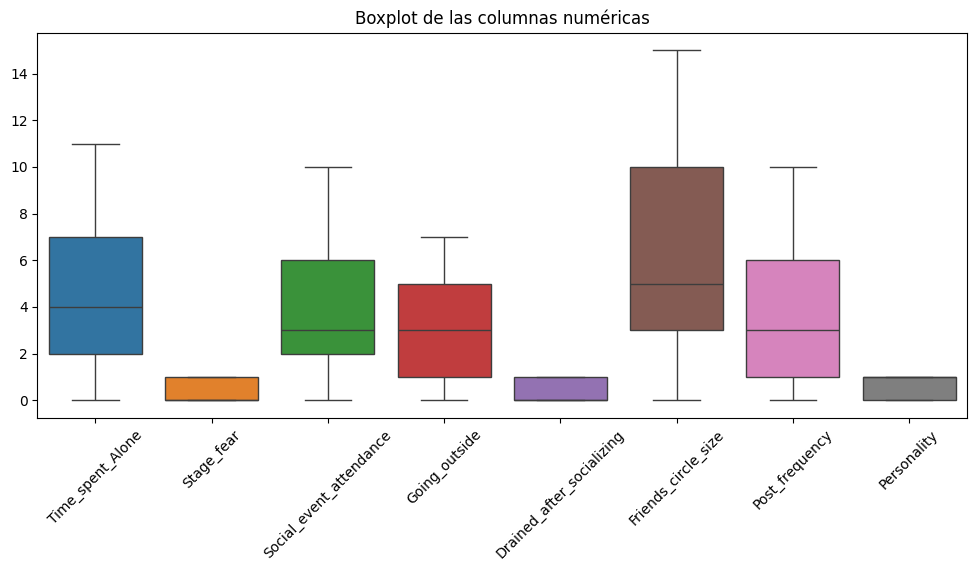

Número de Filas con Valores Atípicos: 0


In [11]:
import seaborn as sns

# Se crea el boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=nuevo_df)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas columnas
plt.title("Boxplot de las columnas numéricas")
plt.show()

# Buscamos valores atípicos en cada columna numérica

Q1 = nuevo_df.quantile(0.25)
Q3 = nuevo_df.quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Definimos los límites de valores normales
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores atípicos
outliers = ((nuevo_df < lower_bound) | (nuevo_df > upper_bound)).any(axis=1)
cant_outliers = outliers.sum()

print("Número de Filas con Valores Atípicos:", cant_outliers)

In [12]:
#Normalizamos los datos
columnas_a_normalizar = nuevo_df.columns[:-1]
final_df = nuevo_df.copy()

for col in columnas_a_normalizar:
    u = final_df[col].mean()
    s = final_df[col].std()
    final_df[col] = (final_df[col] - u) / s
final_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.143763,-0.972616,0.019903,1.350380,-0.970604,1.596512,0.500184,1
1,1.308893,1.027800,-1.370924,-1.350380,1.029931,-1.471512,-0.190711,0
2,1.308893,1.027800,-1.023217,-0.450127,1.029931,-0.291503,-0.536159,0
3,-1.305888,-0.972616,0.715317,1.800506,-0.970604,1.832513,1.536528,1
4,-0.434294,-0.972616,1.758437,0.450127,-0.970604,0.416503,0.500184,1
...,...,...,...,...,...,...,...,...
2895,-0.434294,-0.972616,1.063023,1.350380,-0.970604,-0.055501,0.845632,1
2896,-0.434294,-0.972616,1.410730,0.000000,-0.970604,1.832513,1.881975,1
2897,-0.143763,1.027800,-1.023217,-0.900253,1.029931,-0.527505,-1.227054,0
2898,1.889956,1.027800,-1.023217,0.000000,1.029931,-0.999508,-1.227054,0


In [13]:
correlations = final_df.corr(method='pearson') # Correlacion entre variables todavía no normalizadas
correlations

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.834645,-0.717970,-0.735078,0.832186,-0.700240,-0.717438,-0.712467
Stage_fear,0.834645,1.000000,-0.831188,-0.855403,0.956518,-0.808809,-0.826057,-0.847467
Social_event_attendance,-0.717970,-0.831188,1.000000,0.731757,-0.830079,0.716514,0.726680,0.721568
Going_outside,-0.735078,-0.855403,0.731757,1.000000,-0.852969,0.718331,0.755109,0.739251
Drained_after_socializing,0.832186,0.956518,-0.830079,-0.852969,1.000000,-0.804019,-0.822612,-0.845388
Friends_circle_size,-0.700240,-0.808809,0.716514,0.718331,-0.804019,1.000000,0.687799,0.686321
Post_frequency,-0.717438,-0.826057,0.726680,0.755109,-0.822612,0.687799,1.000000,0.720817
Personality,-0.712467,-0.847467,0.721568,0.739251,-0.845388,0.686321,0.720817,1.000000


si aumentan, aumenta personality porque extrovert es 1. si va a mas eventos sociales y tiene mas amigos es más extrovertido. En cambio si aumenta panico escenico o tiempo en soledad, disminuye personality llevandolo a 0 = introvertido

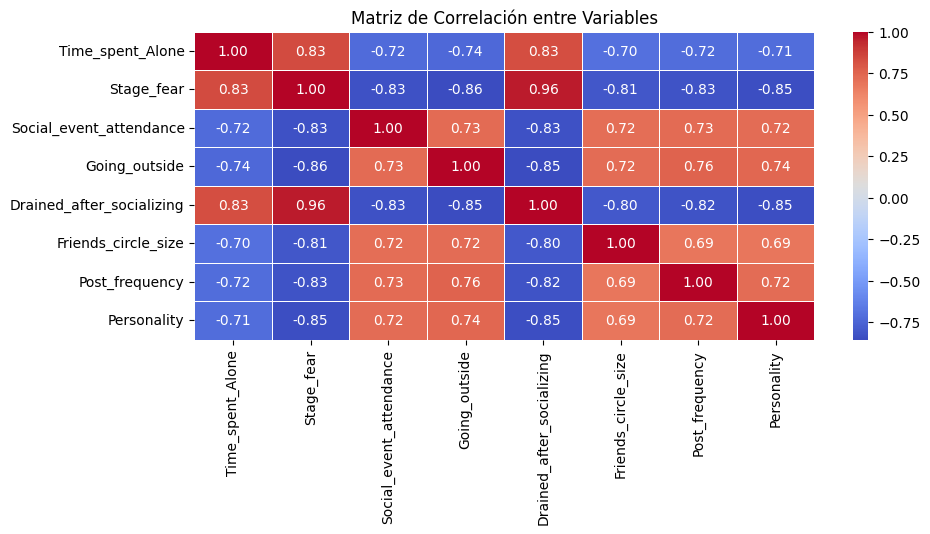

In [14]:
plt.figure(figsize=(10, 4))
sns.heatmap(final_df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

PARTE 2

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np

# seleccion de las columnas de entradas (todas menos la última)
X = final_df.iloc[:, :-1].values
# selecciono la columna de salida (la última)
Y = final_df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)
n = X_train.shape[0] # Número de registros de entrenamiento

# Pesos y sesgos iniciados aleatoriamente para el primer forward propagation 
np.random.seed(9)                      #Con una semilla para reproductibilidad
w_hidden = np.random.rand(4, 7) * 2 - 1
w_output = np.random.rand(1, 4) * 2 - 1

b_hidden = np.random.rand(4, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

#Funciones de activación
relu = lambda x: np.maximum(x,0) #para la capa oculta
logistic = lambda x: 1/(1 + np.exp(-x)) #para la capa de salida

def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

#Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] #solo me importa A2 que es la capa de salida
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int),Y_test) #comparo predicciones con reales
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACURRACY: ", accuracy)

ACURRACY:  0.49120992761116916


In [98]:
#Back propagation

#Tasa de aprendizaje

L = 0.01

#Derivadas de las funciones de activacion
d_relu= lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

def backward_prop(Z1, A1, Z2, A2, X, Y):
    #Derivadas utilizando la regla de la cadena
    dC_dA2 = 2*A2 - 2*Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    #Derivadas del costo con respecto W2, B2, A1, W1 y B1
    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

In [105]:
from tqdm.auto import tqdm as notebook_tqdm

#Decenso de gradiente estocástico

for i in notebook_tqdm(range(100_000)):
    idx = np.random.choice(n,1,replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    #actualizar pesos y sesgos

    w_hidden -= L*dW1
    b_hidden -= L*dB1
    w_output -= L*dW2
    b_output -= L*dB2

    #Calculo de precisión de entrenamiento
    accuracy_train_l = []
    accuracy_test_l = []

    train_predictions = forward_prop(X_train.transpose())[3]
    train_comparisons = np.equal((train_predictions >= .5).flatten().astype(int),Y_train) #comparo predicciones con reales
    train_accuracy = sum(train_comparisons.astype(int) / X_train.shape[0])
    accuracy_train_l.append(train_accuracy)
    

    test_predictions = forward_prop(X_test.transpose())[3] #solo me importa A2 que es la capa de salida
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int),Y_test) #comparo predicciones con reales
    test_accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
    accuracy_test_l.append(test_accuracy)
    

print(f"Precision del entrenamiento: {train_accuracy}")
print(f"Precision de la prueba: {test_accuracy}")

100%|██████████| 100000/100000 [00:53<00:00, 1879.90it/s]

Precision del entrenamiento: 0.9342990170719319
Precision de la prueba: 0.9348500517063093


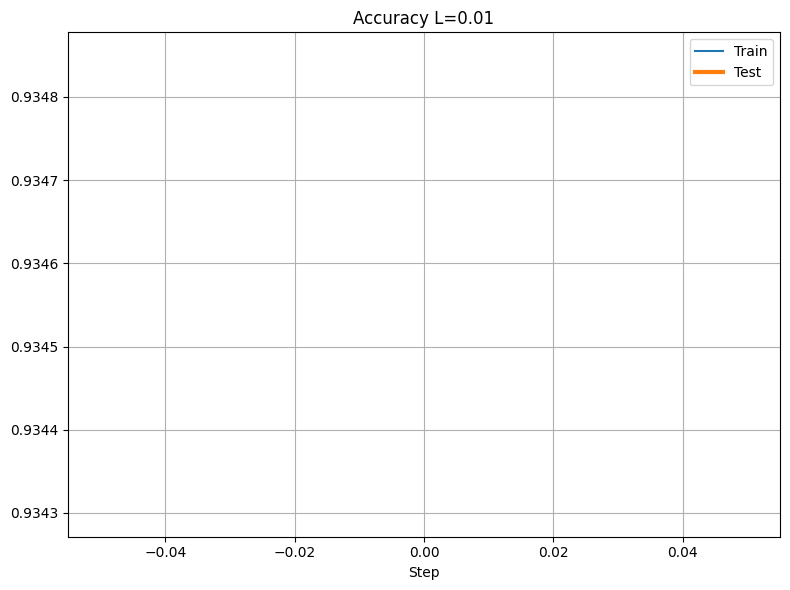

In [ ]:
fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
 }
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
  }
fig, (ax) = plt.subplots(1,1,figsize=(8,6))
ax.plot(accuracy_train_l, label='Train', **fmt_train)
ax.plot(accuracy_test_l, label='Test', **fmt_test)

ax.grid(which='both')
ax.legend()
ax.set_title(f'Accuracy {L=}')
ax.set_xlabel('Step')

fig.tight_layout()
plt.show()